## Example 2 : Malmquist bias

### The impact of the detection limit 

In this example we aim to study
* the concept of luminosity distance
* construct a magnitude limited sample
* consider the effect when two properties are effected by an magnitude limit
* introduce observable volume

Malmquist bias according to oxfordreference.com :

A statistical selection effect that arises in astronomical surveys that are complete to some apparent magnitude limit. At large distances from the observer, only objects that are intrinsically luminous can be seen. Nearer the observer, objects with average or below-average luminosity can also be seen. The statistical properties of the sample therefore depend on distance from the observer in a complicated way. This form of bias, first described in 1924 by the Swedish astronomer Karl Gunnar Malmquist (1893–1982), can be avoided by forming a more restricted volume-limited sample.

Nowadays, the term Malmquist bias is often used to describe the systematic bias on a measured quantity due to random observational errors. For example, random errors in magnitude measurements will lead to an overestimate of the number of galaxies to a given magnitude limit, because there are more galaxies fainter than the limit which are scattered into the sample by measurement errors than there are galaxies brighter than the limit which are scattered out. A random measurement error thus leads to a systematic bias.



### the astropy cosmology module

the astropy module offers a large collection of modules useful for astronomy 

$\quad$ https://www.astropy.org

To get started, we want to use the cosmology module

$\quad$ https://docs.astropy.org/en/stable/cosmology/index.html


#### Example: compute and plot a Friedmann universe

As a first example we use the cosmology module to plot a Friedmann universe. We have to import the module and have to define what cosmology, i.e. which set of cosmological parameters, we want to use

 Hubble constant :  70.0 km / (Mpc s)
 Age of the universe (z=0) :  13.466983947061877 Gyr


Text(0, 0.5, 'expansion parameter')

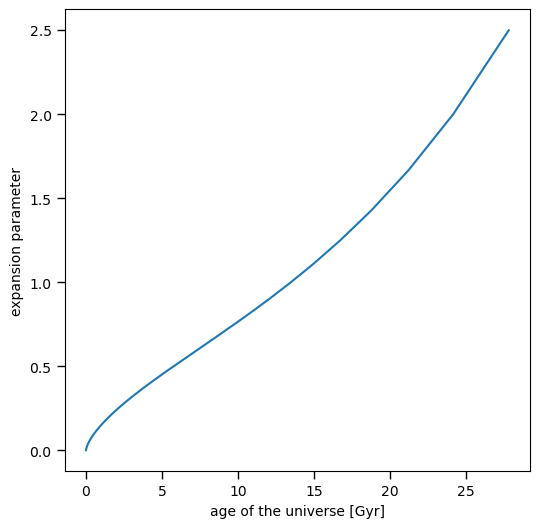

In [5]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

print(' Hubble constant : ', cosmo.H(0))
print(' Age of the universe (z=0) : ', cosmo.age(0)) 

redshift   = np.linspace( -0.6, 1000, 10000 )
age        = cosmo.age( redshift )
expan_para = 1./( 1+redshift)

plt.plot( age, expan_para )
plt.xlabel('age of the universe [Gyr]')
plt.ylabel('expansion parameter')

### Exercise a: Plot the luminosity distance as function of redshift and compare it to Hubble's law

Recall, the comoving radial distance is obtained via an integral of the time dependent Hubble constant.

For a flat universe, the luminosty distance is related to the comoving radial distance via $D_{\rm L} = a_{\rm e}^{-1} \, \xi $.

The cosmology module can gives us the luminosity distance for any redshift.

$\bullet$ Choose a cosmological model and plot Hubble's law (luminosity distance linear to redshift) and luminosity distance as a function of redshift.

note: Hubble actually used the flux-luminosity relation to compute distances, so according to the way he measured 'his' constant it was velocity/redshift vs luminosity distance. When we define the Hubble constant as $H = \dot{a}/a$ this is the comoving distance. In first order the two definitions may agree. Check derivation of supernova project for more information. 

note: the comoving distance as function of redshift can be obtained via $\xi_{12} = \int_{a_1}^{a_2} c / ( a \dot{a} ) \, {\rm d} a $

Example for how to get luminosity distance with the cosmology module in astropy:

In [10]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u 
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
lumdist = cosmo.luminosity_distance(2.0)
print(' Luminosity distance (z=2) : ', lumdist ) 
print(' Luminosity distance (z=2) : ', lumdist.to(u.Mlyr) ) 

 Luminosity distance (z=2) :  15539.586223228129 Mpc
 Luminosity distance (z=2) :  50683.351537850955 Mlyr


### Exercise b: Detection limit of distant sources

flux densities (refers to spectral density) are usually given in Jansky  $1 \, {\rm Jy } = 10^{-26} \, \rm W \, m^{-2} \, Hz^{-1}$

Assume that we observe sources at different redshift each with a flux density of 1 mJy. This rougly corrresponds to the detection limit in deep LOFAR observations  https://lofar-surveys.org/gallery.html?file=static/gallery/LoTSS_Deep_PRimage.png

$\bullet$ Compute the intrinsic luminosity of these sources. Plot intrinsic luminosity as function of redshift (in range 0.01 to 5). 

$\bullet$ Assume that the luminosity of the sources at any redshift shows a lognormal distribution. Chose an appropriate distribution of luminosities and decide which sources would be detected in an observation with a sensitivity of 1 mJy.

Note: actually, with flux density we measure the flux which arrives in a given frequency bin, i.e. 1 Hz. The relation for the luminoisty distance is derived for a bolometric measurement. For a flux density the relation between flux density  $f_\nu$  and luminoisty $L_\nu$ becomes

$\quad L_\nu = 4 \pi f_\nu D_{\rm L}^2 (1+z)^{-(1+\alpha)} $

where the spectrum has the shape $L_\nu \propto \nu^\alpha$. Radio sources often have spectral slope $\alpha$ close to -1, so the correction becomes negligible.

Example for a random distribution of luminosities and redshifts :

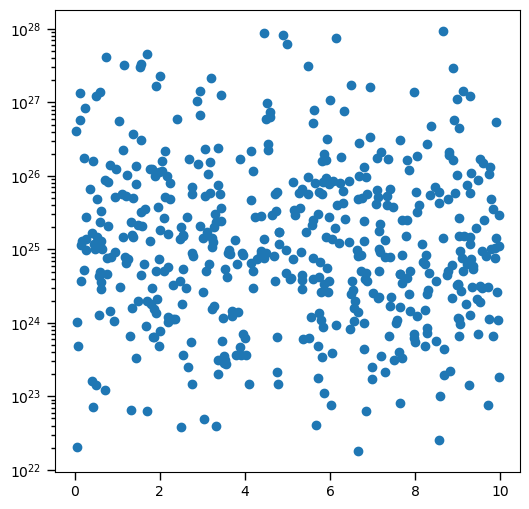

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u 
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


Ngalax = 500
z_max = 10.0 
z_min = 0.02 
mu_radio, sigma_radio = np.log(1e25), 2.5
L_radio = np.random.lognormal( mu_radio, sigma_radio, Ngalax )
z = z_min + np.random.random(Ngalax) * ( z_max - z_min)

plt.plot( z, L_radio, 'o' )
plt.yscale('log')


### Exercise c: Malmquist bias with two properties 

Now, assume that there are two properties, radio and x-ray. Both are affected by a telescope sensitivity, i.e., only sources which are brighter in X-ray and in radio then the limiting flux density will enter the sample.

Assume that the redshift distribution of the sources is random.

$\bullet$ Decide for each source if it is brighter than the limiting flux density in both radio and X-ray. Create a scattter plot of the two propteries. 


Text(0, 0.5, '$L_{\\rm radio}$ [W/Hz]')

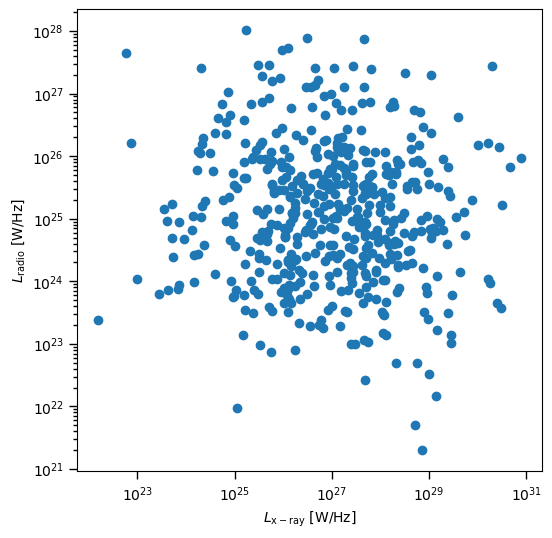

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

Ngalax = 500 

z_max = 10.0 
z_min = 0.02 
z = z_min + np.random.random(Ngalax) * ( z_max - z_min)

mu_radio, sigma_radio = np.log(1e25), 2.5
mu_xray,  sigma_xray  = np.log(1e27), 3.5
L_radio = np.random.lognormal( mu_radio, sigma_radio, Ngalax ) * u.W / u.Hz 
L_xray  = np.random.lognormal( mu_xray , sigma_xray,  Ngalax ) * u.W / u.Hz

plt.scatter( L_xray, L_radio )
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$L_{\rm x-ray}$ [W/Hz]')
plt.ylabel(r'$L_{\rm radio}$ [W/Hz]')



 is shape :  (1, 4001)
correlation coefficient :  0.39741490948753105


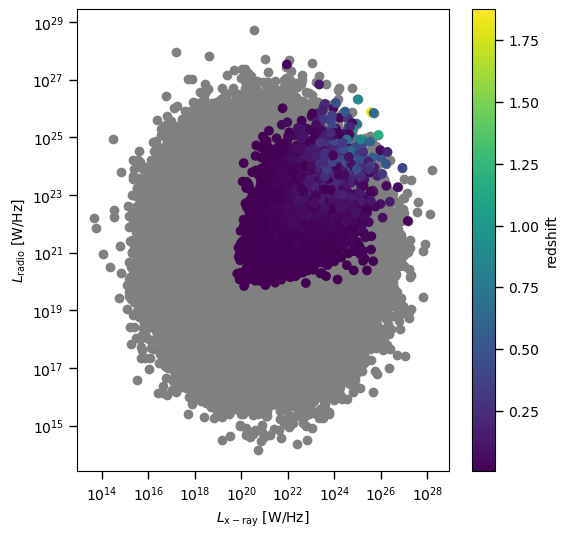

In [38]:

def redshift_sampe( Num, z_min, z_max, model='uniform' ): 

    if model=='PropVolume' : 
        NavPerBin = 30 * (np.log(Num)**2 - 1 )  
        N_z_bins = int(np.floor(Num/NavPerBin))
        z_bin_boundaries = np.linspace( z_min, z_max, N_z_bins ) 
        volumes = (4/3) * np.pi * cosmo.comoving_distance(z_bin_boundaries).value**3
        dvol = np.diff(volumes)
        dNum = np.array( np.round( dvol / np.sum(dvol) * Num ), dtype=np.int64 )
        dNum[-1] += Num - np.sum(dNum) 
        z = []
        for z1, z2, dNi in zip( z_bin_boundaries[:-1], z_bin_boundaries[1:], dNum ) :
            zsub = z1 + np.random.random(dNi) * (z1 - z2)
            z += zsub.tolist()

    else :  # uniform distribution 
        z = z_min + np.random.random(Num) * (z_max - z_min)

    return np.array(z) 
    

def galaxy_sample ( Ngalax, z_min=0.005, z_max=2.0, zmodel='uniform', mu_radio=25, sigma_radio=2.5, mu_xray=25, sigma_xray=2.5 ) :

    L_radio = np.random.lognormal( mu_radio, sigma_radio, Ngalax ) * u.W / u.Hz 
    L_xray  = np.random.lognormal( mu_xray , sigma_xray,  Ngalax ) * u.W / u.Hz

    z = redshift_sampe( Ngalax, z_min, z_max, model=zmodel )

    return L_radio, L_xray, z 


def Lum_min( z, flux_lim ) :
    Dlum = cosmo.luminosity_distance(z)
    L_min = 4. * np.pi * Dlum**2 * flux_lim
    L_min_WHz = L_min.to((u.W/u.Hz))
    return L_min_WHz 
    

def detectable_galaxies( L_radio, L_xray, z, flux_lim_radio, flux_lim_xray ) : 

    L_min_radio = Lum_min( z, flux_lim_radio )
    L_min_xray  = Lum_min( z, flux_lim_xray )

    ix = np.where( (L_radio>L_min_radio) & (L_xray>L_min_xray)  )

    return ix
    


Ngalax         = 500000 

z_max          =  2.0 
z_min          =  0.005
zmodel         = 'uniform'
# zmodel         = 'PropVolume'

mu_radio       = np.log(1e21)
sigma_radio    =  3.5
mu_xray        = np.log(1e21) 
sigma_xray     =  3.5 

flux_lim_radio = 1e-3 * u.Jy
flux_lim_xray  = 1e-3 * u.Jy

L_radio, L_xray, z = galaxy_sample ( Ngalax, z_min=z_min, z_max=z_max, zmodel=zmodel, mu_radio=mu_radio, sigma_radio=sigma_radio, mu_xray=mu_xray, sigma_xray=sigma_xray )

ix = detectable_galaxies( L_radio, L_xray, z, flux_lim_radio, flux_lim_xray )

print( ' is shape : ', np.shape(ix) )

plt.scatter( L_xray, L_radio, c='grey' )
plt.scatter( L_xray[ix], L_radio[ix], c=z[ix] )
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$L_{\rm x-ray}$ [W/Hz]')
plt.ylabel(r'$L_{\rm radio}$ [W/Hz]')
plt.colorbar( label='redshift')
plt.savefig('niceplot.png')

cc = np.corrcoef( np.log((L_radio[ix]).value), np.log((L_xray[ix]).value) )
print('correlation coefficient : ', cc[0,1] )

### Exercise d: Study the correlation coefficient


$\bullet$ Compute the correlation coefficient   https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html  the matrix element [0,1] is the correlation coefficient

In [51]:
cc = np.corrcoef( np.log((L_radio[ix]).value), np.log((L_xray[ix]).value) )
print(cc[0,1])

0.3466549385184794


### Exercise e: Take into account the volume per redshift bin
    
In a real observation we will not have an equal number of galaxies in every redshift bin. To model the dependence of number of galaxies on redshift we can devide the redshift range into bins and choose for each bin a number of galaxies proportional to the volume, which reflects a constant comoving galaxy density. 

$\bullet$ proceed as follows: (i) define a series of redshift bins $[z_i,z_{i+1}]$, (ii) for each redshift bin compute the volume $\frac{4}{3}\pi ( \xi^3(z_{i+1}) -  \xi^3(z_{i}))$, (iii) compute a number of redshift for each bin proportional to that volume, and (iv) join the redshift samples of all bins